# Examine an image of comet C/2014 E2 (Jacques)

For this exercise, we will examine an image of comet C/2014 E2 (Jacques) taken with the BOPPS Infrared Camera (BIRC) onboard the Balloon Observation Platform for Planetary Science (BOPPS). The data are archived at the PDS Small Bodies Node: "Balloon Observation Platform for Planetary Science (BOPPS) 2014 Observations: BIRC Co-Added Images" by Cheng & Hibbits (2015), urn:nasa:pds:bopps2014:scoadded::v1.0. The data are available at: https://pdssbn.astro.umd.edu/holdings/pds4-bopps2014-v1.0/scoadded/SUPPORT/dataset.html.

The data set consists of a aligned and coadded images of three comets and asteroid Ceres, taken through at filter at 0.67 μm, and a series of filters between 2 and 5 μm. The images are binary 2D arrays with PDS4 labels.

The following code is written for Python 3.

## Full script: Download, read, and display the image

Processing label: jaha_0_5_0349_s_0491.xml
Now processing a Header structure: HEADER_0
Now processing a Array_2D_Image structure: Image
Now processing a Table_Character structure: TABLE_0

Axes for Array_2D_Image 'Image' (2 axes, 200 x 320): 

Line (200 elements)
Sample (320 elements)

Display directions: Left to Right, Top to Bottom


<IPython.core.display.Javascript object>


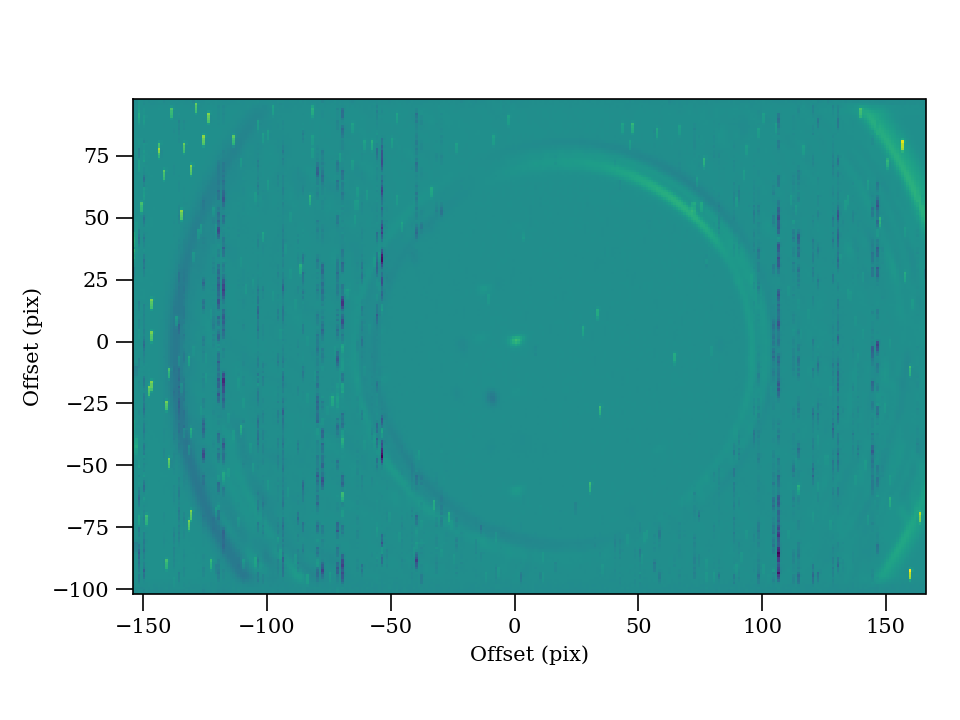

In [25]:
from urllib.request import urlretrieve # to download the data
from pds4_tools import pds4_read       # to read and inspect the data and metadata
import textwrap                        # for reformatting label text
import matplotlib.pyplot as plt        # for plotting

# for plotting in Jupyter notebooks
%matplotlib notebook

# Download data from PDS SBN.  A label and two associated data files. 
label_fn, headers = urlretrieve('https://pdssbn.astro.umd.edu/holdings/pds4-bopps2014-v1.0/scoadded/shift/c2014e2/fw5/jaha_0_5_0349_s_0491.xml', filename='jaha_0_5_0349_s_0491.xml')
image_fn, headers = urlretrieve('https://pdssbn.astro.umd.edu/holdings/pds4-bopps2014-v1.0/scoadded/shift/c2014e2/fw5/jaha_0_5_0349_s_0491.fit', filename='jaha_0_5_0349_s_0491.fit')
table_fn, headers = urlretrieve('https://pdssbn.astro.umd.edu/holdings/pds4-bopps2014-v1.0/scoadded/shift/c2014e2/fw5/jaha_0_5_0349_s_0491.tab', filename='jaha_0_5_0349_s_0491.tab')

# Read in the label (meta-data) and data.  If the data file is saved with the correct
# file name, then reading in the label with pds4_read will also read in the data.
data = pds4_read(label_fn)

# The data is an array named "Image".  There is also an associated table.  Print out a summary of the image.
print()
data['Image'].info()

# The <Display_Settings> describes how to display the array.
disp = data.label.find('.//disp:Display_Settings')

# Find the name of horizontal axis, and its axis number.  We know this is a 2D array, so the only remaining
# axis is the vertical axis.
horz = disp.find('disp:Display_Direction/disp:horizontal_display_axis').text
haxis = data.label.find('.//Axis_Array[axis_name="{}"]/sequence_number'.format(horz))

# we will display images with origin in lower left
imshow_opts = dict(origin='lower')

# make a copy of the array and put it in the correct orientation for a lower left origin
im = data['Image'].data.copy()
if haxis == '2':
    im = im.T  # Swap axes

# Indices are row-major order / last index fastest: disp[vertical, horizontal]
hdisp = disp.find('disp:Display_Direction/disp:horizontal_display_direction').text
vdisp = disp.find('disp:Display_Direction/disp:vertical_display_direction').text
if 'Right to Left' in hdisp:
    im = im[:, ::-1]  # invert horizontal axis
if 'Top to Bottom' in vdisp:
    im = im[::-1]     # invert vertical axis

print('\nDisplay directions: {}, {}'.format(hdisp, vdisp))

# Comet position via BOPPS mission section
bopps = data.label.find('Observation_Area/Mission_Area/bopps:observation_parameters')
cx = int(bopps.find('bopps:centx').text)
cy = int(bopps.find('bopps:centy').text)
imshow_opts['extent'] = (-cx, im.shape[1] - cx, -cy, im.shape[0] - cy)

# Plot the image, including automatic labeling of the axis units.
fig, ax = plt.subplots()
ax.imshow(im, **imshow_opts)
labels = plt.setp(ax, xlabel='Offset (pix)', ylabel='Offset (pix)')
plt.tight_layout()
plt.savefig('image-example-c2014e2.png')